In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score, f1_score

In [35]:
# universal path
csv_path = os.path.join('..','raw_data','churn.csv')

# set dataset into 'data'
data = pd.read_csv(csv_path)

In [6]:
data.head()

churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0             99           16.78              244.7               91   
1            103           16.62              254.4              103   
2            110           10.30              162.6              104   
3             88            5.26              196.9               89   
4            122           12.61              186.9              121   

   totalnightcharge  totalintlminutes  totalintlcalls  totalintlcharge  \
0             11.01              10.0               3             2.70   
1             11.45              13.7               3             3.70   
2              7.32              12.2               5             3.29   
3              8.86               6.6               7             1.78   
4              8.41              10.1               3             2.73   

   numbercustomerservicecalls  
0                           1  
1                           1  
2                           0  
3                           2  
4                           3

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [38]:
data.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count     5000.00000          5000.000000      5000.000000    5000.000000   
mean       100.25860             7.755200       180.288900     100.029400   
std         39.69456            13.546393        53.894699      19.831197   
min          1.00000             0.000000         0.000000       0.000000   
25%         73.00000             0.000000       143.700000      87.000000   
50%        100.00000             0.000000       180.100000     100.000000   
75%        127.00000            17.000000       216.200000     113.000000   
max        243.00000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.649668       200.636560     100.191000       17.054322   
std          9.162069        50.551309      19.826496        4.296843   
min          0.000000         0.000000       0.000000        0.000000   
25%         24.430000       166.375000      87.000000       14.140000   
50%         30.620000       201.000000     100.000000       17.090000   
75%         36.750000       234.100000     114.000000       19.900000   
max         59.760000       363.700000     170.000000       30.910000   

       totalnightminutes  totalnightcalls  totalnightcharge  totalintlminutes  \
count        5000.000000      5000.000000       5000.000000       5000.000000   
mean          200.391620        99.919200          9.017732         10.261780   
std            50.527789        19.958686          2.273763          2.761396   
min             0.000000         0.000000          0.000000          0.000000   
25%           166.900000        87.000000          7.510000          8.500000   
50%           200.400000       100.000000          9.020000         10.300000   
75%           234.700000       113.000000         10.560000         12.000000   
max           395.000000       175.000000         17.770000         20.000000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     5000.000000      5000.000000                 5000.000000  
mean         4.435200         2.771196                    1.570400  
std          2.456788         0.745514                    1.306363  
min          0.000000         0.000000                    0.000000  
25%          3.000000         2.300000                    1.000000  
50%          4.000000         2.780000                    1.000000  
75%          6.000000         3.240000                    2.000000  
max         20.000000         5.400000                    9.000000

In [42]:
data['churn'].value_counts()

No     4293
Yes     707
Name: churn, dtype: int64

In [43]:
# Check number of rows before removing duplicates
len(data)

# Compute the number of duplicated rows
data.duplicated().sum()

0

In [44]:
# NaN percentage for each column
data.isnull().sum().sort_values(ascending=False)/len(data) 

churn                         0.0
accountlength                 0.0
totalintlcharge               0.0
totalintlcalls                0.0
totalintlminutes              0.0
totalnightcharge              0.0
totalnightcalls               0.0
totalnightminutes             0.0
totalevecharge                0.0
totalevecalls                 0.0
totaleveminutes               0.0
totaldaycharge                0.0
totaldaycalls                 0.0
totaldayminutes               0.0
numbervmailmessages           0.0
voicemailplan                 0.0
internationalplan             0.0
numbercustomerservicecalls    0.0
dtype: float64

In [45]:
# categorical to regression, No = 0, Yes = 1
le = LabelEncoder()

data['churn'] = le.fit_transform(data['churn'])
data['internationalplan'] = le.fit_transform(data['internationalplan'])
data['voicemailplan'] = le.fit_transform(data['voicemailplan'])

In [46]:
data

churn  accountlength  internationalplan  voicemailplan  \
0         0            128                  0              1   
1         0            107                  0              1   
2         0            137                  0              0   
3         0             84                  1              0   
4         0             75                  1              0   
...     ...            ...                ...            ...   
4995      0             50                  0              1   
4996      1            152                  0              0   
4997      0             61                  0              0   
4998      0            109                  0              0   
4999      0             86                  0              1   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
0                      25            265.1            110           45.07   
1                      26            161.6            123           27.47   
2                       0            243.4            114           41.38   
3                       0            299.4             71           50.90   
4                       0            166.7            113           28.34   
...                   ...              ...            ...             ...   
4995                   40            235.7            127           40.07   
4996                    0            184.2             90           31.31   
4997                    0            140.6             89           23.90   
4998                    0            188.8             67           32.10   
4999                   34            129.4            102           22.00   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
0               197.4             99           16.78              244.7   
1               195.5            103           16.62              254.4   
2               121.2            110           10.30              162.6   
3                61.9             88            5.26              196.9   
4               148.3            122           12.61              186.9   
...               ...            ...             ...                ...   
4995            223.0            126           18.96              297.5   
4996            256.8             73           21.83              213.6   
4997            172.8            128           14.69              212.4   
4998            171.7             92           14.59              224.4   
4999            267.1            104           22.70              154.8   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
0                  91             11.01              10.0               3   
1                 103             11.45              13.7               3   
2                 104              7.32              12.2               5   
3                  89              8.86               6.6               7   
4                 121              8.41              10.1               3   
...               ...               ...               ...             ...   
4995              116             13.39               9.9               5   
4996              113              9.61              14.7               2   
4997               97              9.56              13.6               4   
4998               89             10.10               8.5               6   
4999              100              6.97               9.3              16   

      totalintlcharge  numbercustomerservicecalls  
0                2.70                           1  
1                3.70                           1  
2                3.29                           0  
3                1.78                           2  
4                2.73                           3  
...               ...                         ...  
4995             2.67                           2  
4996             3.97                           3  
4997             3

In [47]:
data.corr()['churn'].sort_values()

voicemailplan                -0.110698
numbervmailmessages          -0.097633
totalintlcalls               -0.046893
totalnightcalls              -0.006986
totalevecalls                -0.006284
totaldaycalls                 0.016130
accountlength                 0.021203
totalnightcharge              0.045673
totalnightminutes             0.045677
totalintlcharge               0.063275
totalintlminutes              0.063285
totalevecharge                0.089282
totaleveminutes               0.089288
totaldaycharge                0.207700
totaldayminutes               0.207705
numbercustomerservicecalls    0.212564
internationalplan             0.259123
churn                         1.000000
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='totaldayminutes'>

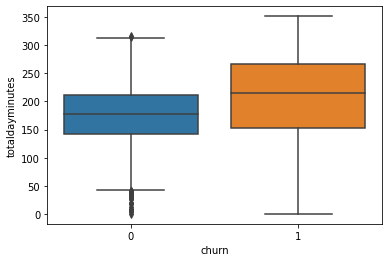

In [48]:
# Does not show much 
# sns.scatterplot(x='totaldayminutes', y='churn', data=data) 

sns.boxplot(data = data, y = 'totaldayminutes', x='churn')

<AxesSubplot:xlabel='totaldayminutes', ylabel='totalnightminutes'>

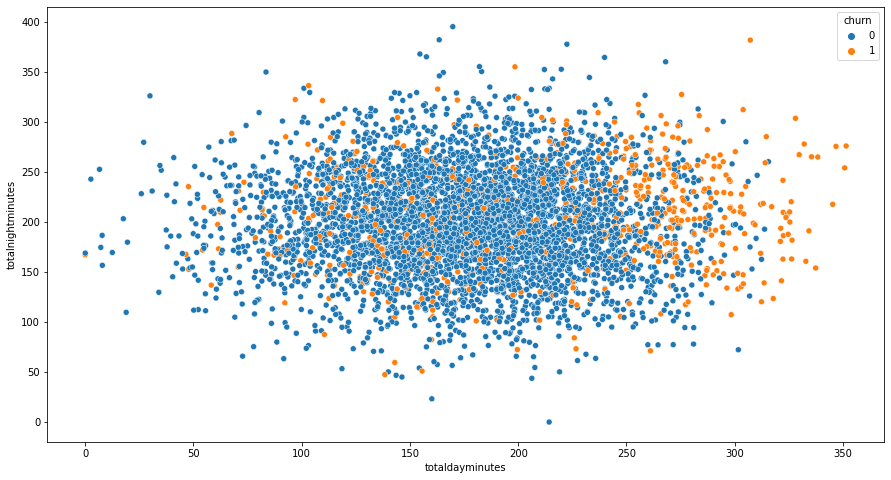

In [64]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=data, x='totaldayminutes', y='totalnightminutes', hue='churn')

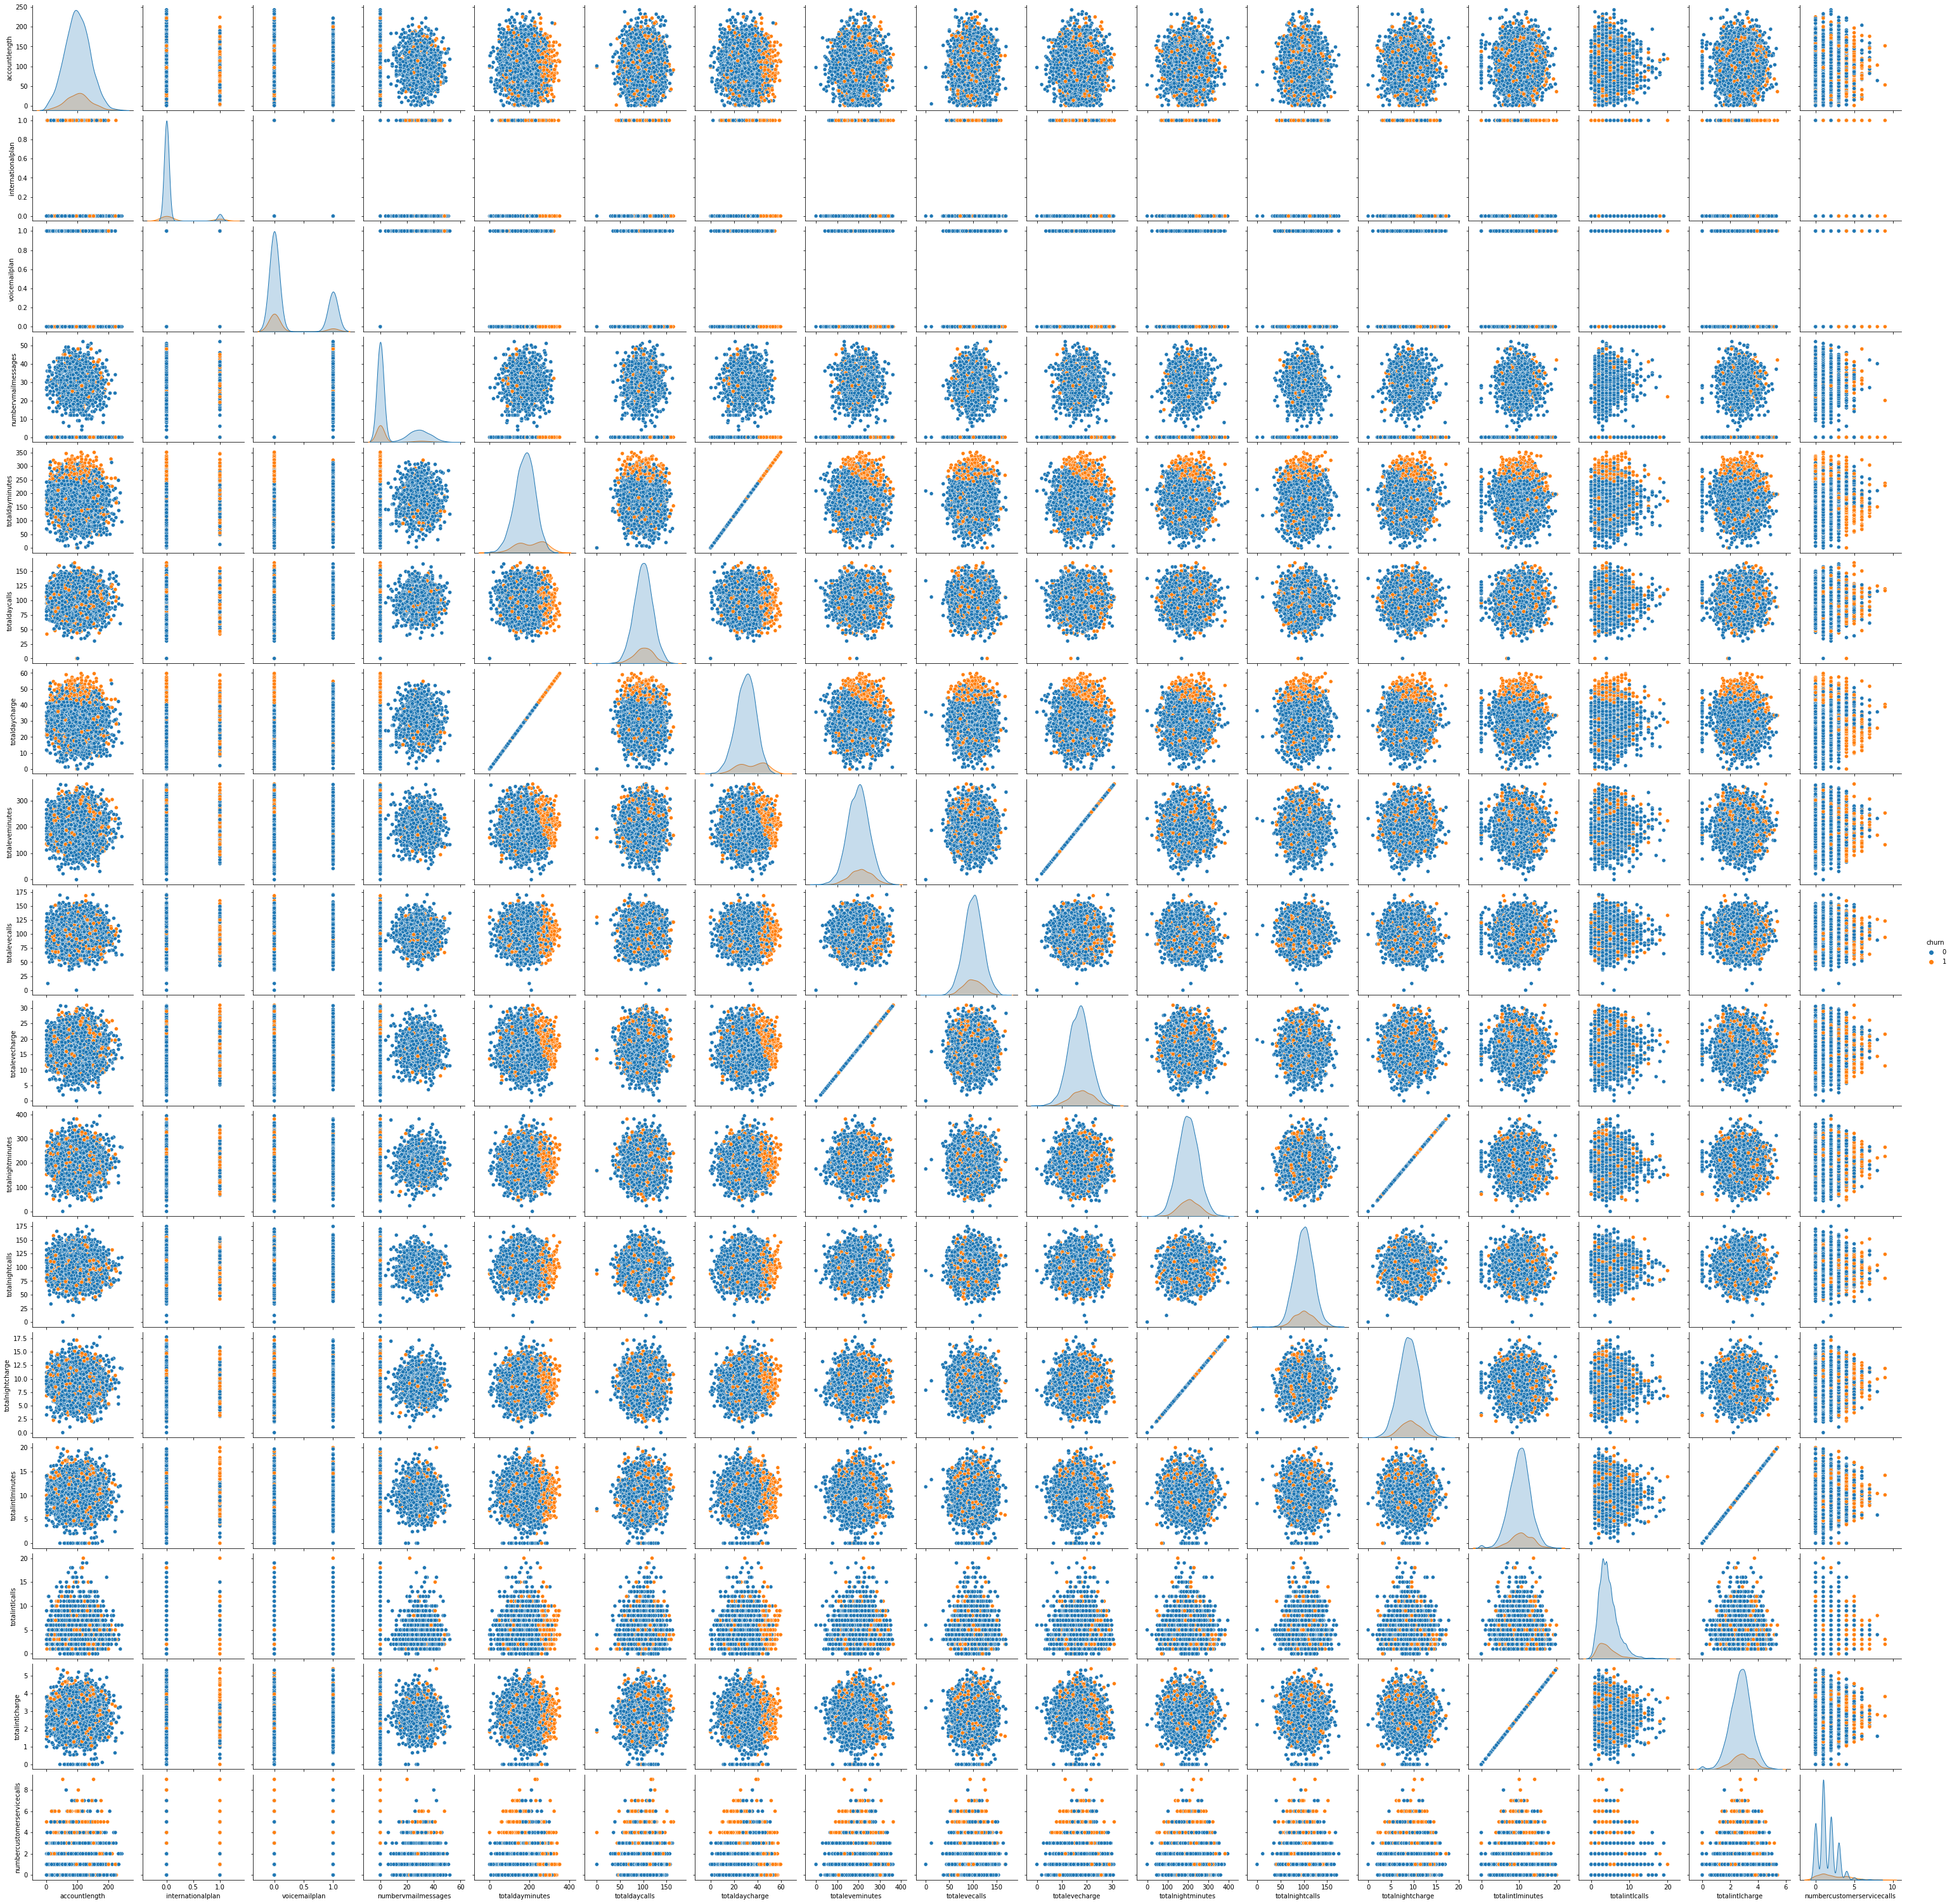

In [65]:
sns.pairplot(data, hue='churn')

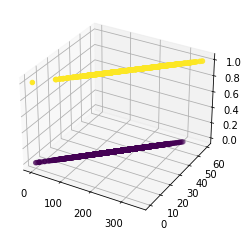

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['totaldayminutes'], data['totaldaycharge'], data['churn'], c = data['churn'])

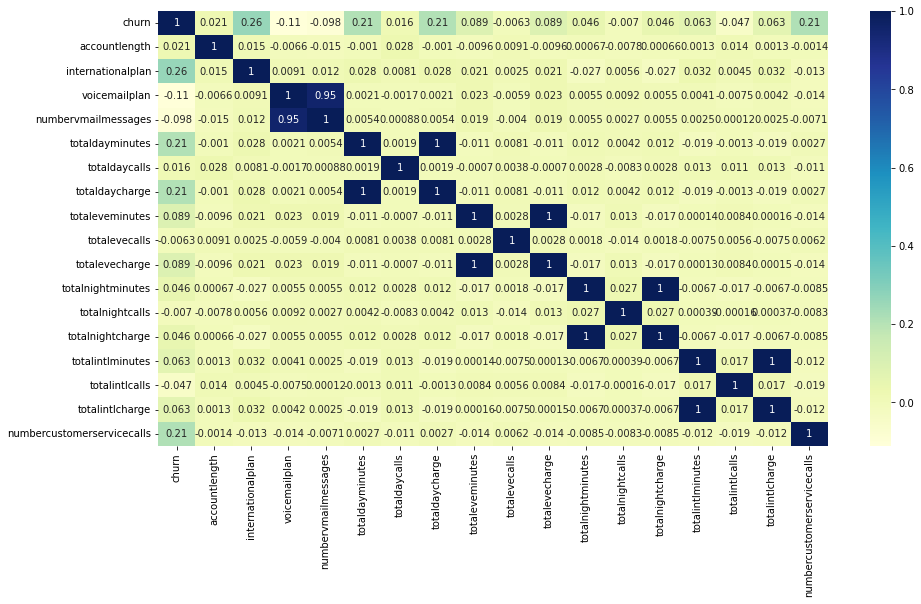

In [67]:
#Size of plot
plt.figure(figsize = (15,8))

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True,
        cmap= "YlGnBu");

In [50]:
# Single data where day calls are 0(zeros)
# In consideration of dropping (outlier?)
# Keep for now, since it is possible for such a customer to have such calls.
data[(data['totaldayminutes'] == 0) & (data['churn'] > 0)]

churn  accountlength  internationalplan  voicemailplan  \
1345      1             98                  0              0   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
1345                    0              0.0              0             0.0   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
1345            159.6            130           13.57              167.1   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
1345               88              7.52               6.8               1   

      totalintlcharge  numbercustomerservicecalls  
1345             1.84                           4

In [51]:
# setting X and y
X = data.drop(columns = 'churn')
y = data['churn']

In [52]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
log_model = LogisticRegression(solver='saga', multi_class = 'ovr', max_iter=1000)

In [91]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'l1_ratio': [0, 1, 20], 'C' : np.logspace(0, 10, 20)},

In [93]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [94]:
grid_model.fit(X_train_scaled, y_train)

/Users/jasonhou/.pyenv/versions/3.8.12/envs/pjt_churn/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jasonhou/.pyenv/versions/3.8.12/envs/pjt_churn/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jasonhou/.pyenv/versions/3.8.12/envs/pjt_churn/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/jasonhou/.pyenv/versions/3.8.12/envs/pjt_churn/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jasonhou/.pyenv/versions/3.8.12/envs/pjt_churn/lib/python3.8/site-packages/sklearn/linear_model/_

GridSearchCV(estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='saga'),
             param_grid=({'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                          'l1_ratio': [0, 1, 20],
                          'penalty': ['l1', 'l2', 'elasticnet']},))

In [95]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0, 'penalty': 'l1'}

In [96]:
y_pred = grid_model.predict(X_test_scaled)

In [97]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [98]:
accuracy_score(y_test, y_pred)

0.8726666666666667

In [115]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
confusion_matrix = pd.crosstab(index = results_df['Actual'], columns = results_df['Predicted'])
confusion_matrix

Predicted     0   1
Actual             
0          1254  39
1           152  55

plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1293
           1       0.59      0.27      0.37       207

    accuracy                           0.87      1500
   macro avg       0.74      0.62      0.65      1500
weighted avg       0.85      0.87      0.85      1500



In [103]:
precision_score(y_test, y_pred)

0.5851063829787234

In [104]:
recall_score(y_test, y_pred)

0.26570048309178745